---

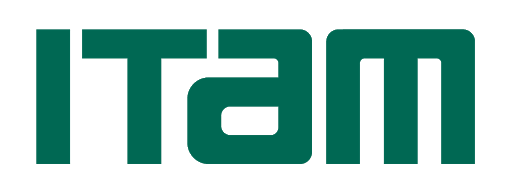

In [248]:
# Inicio de M para usuarios.
from IPython.core.display import Image, display
from tqdm import tqdm
display(Image('C:/Users/DANIEL/Documents/ITAM/Diplomado/04_Machine_Learning/logo_itam.png', width=700, unconfined=True))

---

<font color='#508072'> 
$ \Large \textbf {Data science and machine learning applied to financial markets} $

<font color='#508072'> 
$ \normalsize \textbf {Author: Daniel Omar Becerril Olguín} $

<font color='#508072'> 
$ \normalsize \textbf {CU: 183605} $

---

# Prerequisites

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed
from sklearn.datasets import make_moons
from numpy.random import uniform
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection 
from sklearn.metrics import f1_score


#Models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

#Ensambles
from sklearn.ensemble import BaggingClassifier


%config InlineBackend.figure_format = "retina"


In [59]:
import sys
sys.path.append("../../Diplomado/04_Machine_Learning/machine-learning-master/files")
import utils

---

<h2 style="color:crimson">DATA</h2>


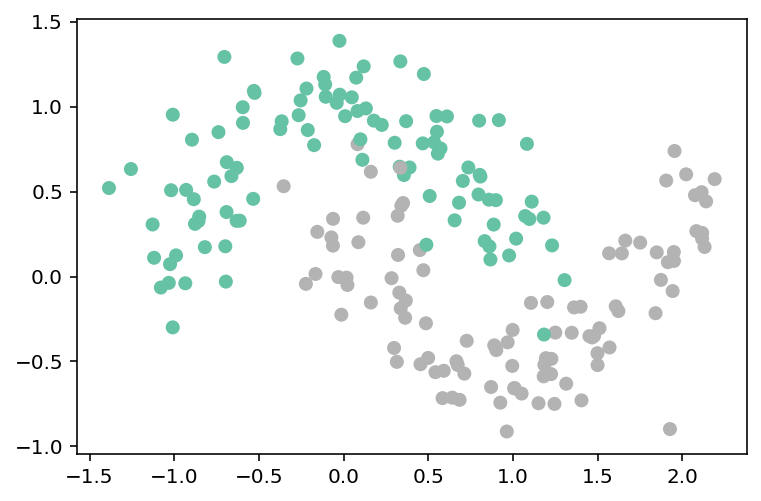

In [3]:
noise = 0.2
X, y = make_moons(200, noise=0.2, random_state=2718)
X_test, y_test = make_moons(40, noise=noise, random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [4]:
X_test

array([[ 0.17963431,  0.1269183 ],
       [ 2.17337022, -0.01437503],
       [-1.21665128,  0.27219252],
       [ 0.85326928, -0.06993586],
       [ 0.44924408,  0.7034091 ],
       [-0.71849204,  0.66815677],
       [ 0.58284765, -0.54104941],
       [-0.29690274,  1.12061979],
       [ 0.81235019, -0.48519181],
       [ 0.01054161,  0.99952376],
       [ 0.23065139, -0.30735906],
       [-0.04207443,  0.82319519],
       [ 0.96226517,  0.80475644],
       [ 0.0399731 , -0.00363047],
       [ 0.9572691 , -0.64161571],
       [ 0.34617282,  1.05176832],
       [ 0.86671436,  0.39508336],
       [ 1.50208211, -0.59382023],
       [ 0.59702501, -0.82770845],
       [ 0.93957263,  0.31077272],
       [-0.40737045,  0.90031625],
       [ 1.21080327,  0.05450401],
       [-0.37255254,  1.14731032],
       [ 1.70712617, -0.26050068],
       [ 0.31100971,  0.19087705],
       [-0.81729231,  0.21512145],
       [ 1.60946998, -0.57504438],
       [-0.90503178, -0.02453837],
       [ 0.20844531,

<h2 style="color:crimson">TAREA III</h2>

1. Crea un pipeline llamado `model` que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (`LogisticRegression(penalty="none")`)

---

In [25]:
#Grado del polinomio
gdo_polinomio = 30

In [32]:
#Genera modelo
model = Pipeline([
    ("poly", PolynomialFeatures(gdo_polinomio)),
    ("logistic", LogisticRegression(penalty="none", solver='lbfgs'))
])

grid = {
    "logistic__C":np.logspace(-3,3,7)
}


In [34]:
# Inicializando el modelo
gsearch = GridSearchCV(estimator=model, param_grid=grid)
gsearch.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting pena

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=30,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                               

In [39]:
#Mejores parámetros
gsearch.best_estimator_

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=30, include_bias=True,
                                    interaction_only=False, order='C')),
                ('logistic',
                 LogisticRegression(C=0.001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [38]:
#Score conseguido
gsearch.best_score_

0.895

2. Realiza un _Bagging Classifer_ de `model` llamado `bagging_logreg` con `n_estimators=100` y `random_state=314`

---

In [51]:
bagging_logreg = BaggingClassifier(model, n_estimators=100, random_state=314, n_jobs=-1)


3. Entrena `model` y `bagging_logreg` considerando `X` y `y` definido arriba

---

In [52]:
bagging_logreg.fit(X, y)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('poly',
                                                  PolynomialFeatures(degree=30,
                                                                     include_bias=True,
                                                                     interaction_only=False,
                                                                     order='C')),
                                                 ('logistic',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                          

In [53]:
results = model_selection.cross_val_score(bagging_logreg, X, y) 
print("accuracy :") 
print(results.mean()) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


accuracy :
0.9104278074866311


4. Grafica la función de decisión dada por `model` y por `bagging_logreg` ¿Qué observas?

---

Wall time: 3min 1s


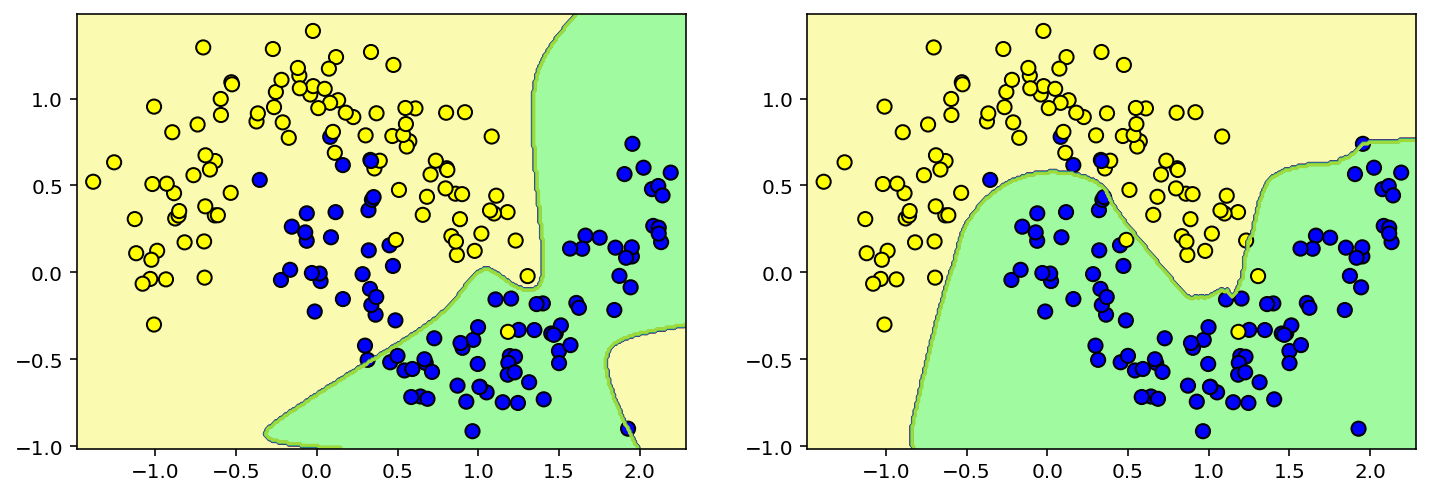

In [63]:
%%time
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

utils.plot_classf_model(X, y, gsearch, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

El modelo de Bagging Classifier es mucho más certero en la diferenciación de clases

5. Considerando un `f1_score` (dentro de `sklearn.metrics`), calcula el *f1-score* sobre el test set (`X_test`, `y_test`) considerando `model` y `bagging_logreg`. ¿Qué resultados arroja?

---

In [73]:
print('F1 score: MODELO REG_LOG + POLINOMIO')
print('***'*30)
print(f1_score(y_test, gsearch.predict(X_test), average='weighted'))
print('\n'*3)

print('F1 score: BAGGING')
print('***'*30)
print(f1_score(y_test, bagging_logreg.predict(X_test), average='weighted'))
print('\n'*3)

F1 score: MODELO REG_LOG + POLINOMIO
******************************************************************************************
0.8465473145780052




F1 score: BAGGING
******************************************************************************************
0.9749843652282676




